# BRATS
The code for the BRATS experiments is organized as follows:
- ```create_dataset``` function to create a DVN2 dataset of the BRATS 2018 dataset
- ```train``` function to create a DVN2 model according to the specified options that can be trained, saved, used for testing
- ```make_table```, ```make_plot``` and ```make_example``` functions to create results table, ROC plot and figure with qualitative examples, respectively

## Create the BRATS dataset
First, you have to unzip the training data of BRATS 2018 under the /BRATS/MICCAI_BraTS_2018_Data_Training directory.
Then, using the ```create_dataset``` function you can convert it to a DVN2 Dataset object.
This can be done using multiple options, e.g., to obtain a "train" or "val" dataset of a specific fold, retain only a certain fraction or even mask the "LGG" or "HGG" cases with zeros.

In [1]:
import numpy as np
from BRATS.dataset import create_dataset


brats_dataset = create_dataset(data=None, fold_i=None, mask_subset="lgg")
mean_wt_size_1mm = np.mean([brats_dataset[case_id]["record_0"]["output"].load().sum() for case_id in brats_dataset])
mean_wt_size_2mm = mean_wt_size_1mm / 8
print("Mean whole tumor size: {:.0f} (@ 1 x 1 x 1 mm) and {:.0f} (@ 2 x 2 x 2 mm)".format(mean_wt_size_1mm, mean_wt_size_2mm))

Mean whole tumor size: 70921 (@ 1 x 1 x 1 mm) and 8865 (@ 2 x 2 x 2 mm)


## Create DVN2 model and do training
All experiments of the paper can be run using the ```train``` function and using permutations of the following options:
- $\Phi$ in ["I", "BI"]  # note that in BRATS C = 1
- $\epsilon$ in [1e-7, 8789, 12412]
- batch_size in [1, 2, 4, 8]
- fraction in [0.74, 1]

In [1]:
from BRATS.training import train

train(
    fold_i=0,
    mask_subset=None,
    fraction=1,
    phi="BIC",
    epsilon=1e-7,
    batch_size=2
)

## Perform the analysis
Using the saved model or predictions, we can now create the results using the ```make_table```, ```make_plot``` and ```make_example``` functions.

2022-08-21 20:42:04.116473: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


subset                                            hgg                 lgg
phi                                                BI                  BI
epsilon                                  1.000000e-07        1.000000e-07
fraction mask_subset batch_size                                          
1        lgg         4           [0.75, -15.38, 79.7]  [0.56, 4.19, 4.19]


/Volumes/micapollo01_MIC_DATA/STAFF/jberte3/data/phd/git/deepvoxnet2/deepvoxnet2/analysis/plotting.py:385: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/var/folders/4l/112z1js51xvdf6df5282nzbw001syh/T/ipykernel_38646/3247325195.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  example_b.show()


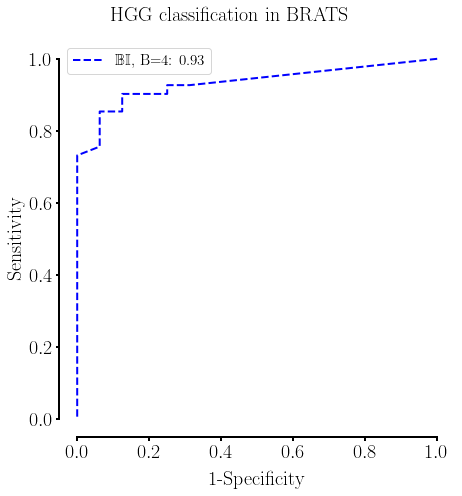

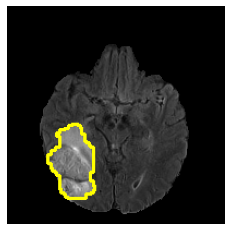

In [2]:
from BRATS.results import make_table, make_plot, make_example

results = make_table(
    fold_is=(0,),
    mask_subset="lgg",
    fraction=1,
    phi="BI",
    epsilon=1e-7,
    batch_size=4)
print(results.applymap(lambda x: np.mean(x, axis=0).round(2)))
roc = make_plot(results)
roc.show()
example_b = make_example(results, "HGG/Brats18_CBICA_BFB_1", slice_id=60)
example_b.show()